In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import animation, rc

# Display matplotlib animations as HTML5 videos
rc('animation', html='html5')

## Linear Transformations
You can manipulate a vector by multiplying it with a matrix. The matrix acts as a function that operates on an input vector to produce a vector output. Specifically, matrix multiplications of vectors are *linear transformations* that transform the input vector into the output vector.

### Note: Properties for being a linear transformation--

* All lines must remain lines after transformation, without gettig curved
* And origin must remains fixed


For example, consider this matrix ***A*** and vector ***v***:

$$ A = \begin{bmatrix}2 & 3\\5 & 2\end{bmatrix} \;\;\;\; \vec{v} = \begin{bmatrix}1\\2\end{bmatrix}$$

We can define a transformation ***T*** like this:

$$ T(\vec{v}) = A\vec{v} $$

To perform this transformation, we simply calculate the dot product by applying the *RC* rule; multiplying each row of the matrix by the single column of the vector:

$$\begin{bmatrix}2 & 3\\5 & 2\end{bmatrix} \cdot  \begin{bmatrix}1\\2\end{bmatrix} = \begin{bmatrix}8\\9\end{bmatrix}$$

Here's the calculation in Python:

In [0]:
v = np.array([1,2])
A = np.array([[2,3],
              [5,2]])
t = A@v
t

array([8, 9])

'[alt' is not recognized as an internal or external command,
operable program or batch file.


In [0]:
# Create a grid of points in x-y space 
xvals = np.linspace(-4, 4, 9)
yvals = np.linspace(-3, 3, 7)
xygrid = np.column_stack([[x, y] for x in xvals for y in yvals])

In [0]:
def colorizer(x, y):
    """
        Map x-y coordinates to a unique rgb color
    """
    r = min(1, 1 - y/3)
    g = min(1, 1 + y/3)
    b = 1/4 + x/16
    return r, g, b

In [0]:
# Map grid coordinates to colors. Done only for xygrid, not all grids.
colors = list(map(colorizer, xygrid[0], xygrid[1]))

In [4]:
# Apply linear transform by the new basis vectors u, v = (2, 1), (-1, 1). I.e, the matrix [[2, -1], [1, 1]]
A = np.column_stack([[1, 0], [1, 2]])
print(A)
uvgrid = A @ xygrid # @ is matrix multiply, * is elementwise multiplication, with broadcasting.


[[1 1]
 [0 2]]


NameError: ignored

There are several different kinds of 2D linear transformations that we can describe using matrices.

* **Shear transformations**: 
In this transformation either ***x***-basic vector or ***y***-basic vector is fixed and other go on transformation. e.i
initially the two basic vector is--

$$\begin{bmatrix}\vec{x} & \vec{y}\end{bmatrix}=\begin{bmatrix}1 & 0\\0 & 1\end{bmatrix}$$

after transformation (shear on ***y***)- the new basic vector become ***u*** & ***v*** 

$$\begin{bmatrix}\vec{x_T} & \vec{y_T}\end{bmatrix}=\begin{bmatrix}\vec{u} & \vec{v}\end{bmatrix}=\begin{bmatrix}1 & 1\\0 & 2\end{bmatrix}$$



<img src="https://notgnoshi.github.io/assets/posts/linear-transformations/shear.svg">

In [0]:
def plot_grid(grid):
    """
        Plots a grid on the x-y plane. Useful for showing transformations
    """
    # Plot grid points 
    plt.figure(figsize=(4, 4), facecolor="w")
    plt.scatter(grid[0], grid[1], s=36, c=colors, edgecolor="none")

    # Set axis limits
    plt.grid(False)
    plt.axis("equal")
    plt.show()

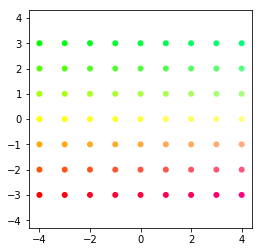

In [0]:
plot_grid(xygrid)

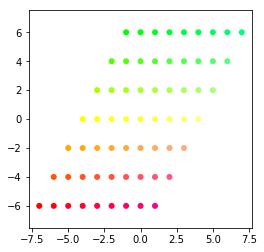

In [0]:
plot_grid(uvgrid)

In [0]:
def stepwise_transform(A, grid, num_steps):
    """
        Returns a list of transformed grids, stepping from the given grid to the grid A @ grid.
    """
    # create empty array of the right size
    transgrid = np.zeros((num_steps + 1, ) + np.shape(grid))
    # compute intermediate transforms
    for i in range(num_steps + 1):
        intermediate = np.eye(2) + i / num_steps * (A - np.eye(2))
        # apply intermediate matrix transformation
        transgrid[i] = intermediate @ grid
    return transgrid

In [0]:
def animate_transform(A, grid=None, num_steps=50, repeat=False):
    """
        Animates the effect a transform has on a given grid. If no grid is given, one will be generated.
        
        You can expect a small delay while the function generates the animation.
    """
    if grid is None:
        # Create a grid of points in x-y space 
        xvals = np.linspace(-4, 4, 9)
        yvals = np.linspace(-3, 3, 7)
        grid = np.column_stack([[x, y] for x in xvals for y in yvals])

    # Map grid coordinates to colors. Done only for xygrid, not all grids.
    colors = list(map(colorizer, grid[0], grid[1]))
    intermediate_transforms = stepwise_transform(A, grid, num_steps)
    fig = plt.figure(figsize=(6, 6))

    xmin = min(min(grid[0]), min(intermediate_transforms[-1][0]))
    xmax = max(max(grid[0]), max(intermediate_transforms[-1][0]))
    ymin = min(min(grid[1]), min(intermediate_transforms[-1][1]))
    ymax = max(max(grid[1]), max(intermediate_transforms[-1][1]))

    ax = plt.axes(xlim=(xmin, xmax), ylim=(ymin, ymax)) # For making the axises so that the complete fig come inside it.
    scatter = ax.scatter(grid[0], grid[1], c=colors)
    # Prevent `%matplotlib inline` from displaying the above scatter plot.
    plt.close()

    def update(i):
        """Draws the ith intermediate transform"""
        scatter.set_offsets(intermediate_transforms[i].T)
        return scatter,
# animation.FuncAnimation() is a function is used for showing continous change(or to animate such)
# interval arguments define at what interval the frame will change-- make changes to see yourself, interval=100 will slow your frame rate.
# No. of frames, how many frames to be animated -- frames-- argument is use
    return animation.FuncAnimation(fig, update, interval=50, frames=num_steps, blit=True, repeat=repeat)

In [0]:
A = np.column_stack([[1, 0], [2, 1]])
anim = animate_transform(A, repeat=True)
anim.save('shear.mp4')
anim



* **Projection transformations**: 




<img src="https://notgnoshi.github.io/assets/posts/linear-transformations/projection.svg">

In [0]:
A = np.column_stack([[1, 0], [0, 0]])
anim = animate_transform(A, repeat=True)
anim.save('projection.mp4')
anim


* **Rotation transformations**: 
 In this transformation either ***x***-basic vector or ***y***-basic vector is fixed and other go on transformation. e.i
initially the two basic vector is--

$$\begin{bmatrix}\vec{x} & \vec{y}\end{bmatrix}=\begin{bmatrix}1 & 0\\0 & 1\end{bmatrix}$$

after transformation (shear on ***y***)- the new basic vector become ***u*** & ***v*** 

$$\begin{bmatrix}\vec{x_T} & \vec{y_T}\end{bmatrix}=\begin{bmatrix}\vec{u} & \vec{v}\end{bmatrix}=\begin{bmatrix}1 & 1\\0 & 2\end{bmatrix}$$



<img src="https://notgnoshi.github.io/assets/posts/linear-transformations/rotation.svg">

[[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]


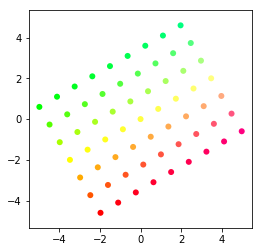

In [0]:
theta = np.pi / 6 # 30 degree clockwise rotation
A = np.column_stack([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])
print(A)
uvgrid = A @ xygrid # @ is matrix multiply, * is elementwise multiplication, with broadcasting.
plot_grid(uvgrid)

In [0]:

#A = np.column_stack([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])
B=np.column_stack([[0,1],[-1,0]])
print(B)
anim = animate_transform(B, repeat=True)
anim.save('rotation.mp4')
anim

[[ 0 -1]
 [ 1  0]]




* **Permutation transformations**: 
In this transformation ***x***-basic vector and ***y***-basic vector replaces itself to one another e.i
initially the two basic vector is--

$$\begin{bmatrix}\vec{x} & \vec{y}\end{bmatrix}=\begin{bmatrix}1 & 0\\0 & 1\end{bmatrix}$$

after transformation (shear on ***y***)- the new basic vector become ***u*** & ***v*** 

$$\begin{bmatrix}\vec{x_T} & \vec{y_T}\end{bmatrix}=\begin{bmatrix}\vec{u} & \vec{v}\end{bmatrix}=\begin{bmatrix}0 & 1\\1 & 0\end{bmatrix}$$





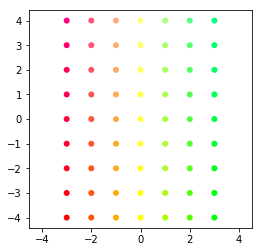

In [0]:
A = np.column_stack([[0, 1], [1, 0]])
uvgrid = A @ xygrid
anim = animate_transform(A, repeat=True)
anim.save('permutation.mp4')
plot_grid(uvgrid)

In [0]:
anim



* **Scale transformations**: 




<img src="https://notgnoshi.github.io/assets/posts/linear-transformations/scale.svg">

In [0]:
B = np.matrix([[1, 2], [3, 4]])
A @ B

matrix([[3, 4],
        [1, 2]])

In [0]:
A = np.column_stack([[2, 0], [0, 5]])
anim = animate_transform(A, repeat=True)
anim.save('scale.mp4')
anim



* **Reflection transformations**: 
In this transformation either ***x***-basic vector or ***y***-basic vector is fixed and other go on reflection to oyher. e.i
initially the two basic vector is--

$$\begin{bmatrix}\vec{x} & \vec{y}\end{bmatrix}=\begin{bmatrix}1 & 0\\0 & 1\end{bmatrix}$$

after transformation (shear on ***y***)- the new basic vector become ***u*** & ***v*** 

$$\begin{bmatrix}\vec{x_T} & \vec{y_T}\end{bmatrix}=\begin{bmatrix}\vec{u} & \vec{v}\end{bmatrix}=\begin{bmatrix}-1 & 0\\0 & 1\end{bmatrix}$$



<img src="https://notgnoshi.github.io/assets/posts/linear-transformations/reflection.svg">

In [0]:
A = np.column_stack([[-1, 0], [0, 1]])
anim = animate_transform(A, repeat=True)
anim.save('Reflection.mp4')
anim

In [7]:
# Combination of two transform scale and rotation
# Its the composition of the matrix.
theta = np.pi / 6 # 30 degree clockwise rotation
A = np.column_stack([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])
B = np.column_stack([[2, 0], [0, 1]])
C = A @ B
print(C)
anim = animate_transform(A @ B, repeat=True)
#anim.save('combination.mp4')
anim

[[ 1.73205081 -0.5       ]
 [ 1.          0.8660254 ]]


In [0]:
animate_transform(B @ A, repeat=True)